# JoyHW 2
(3 점)
퍼셉트론 알고리즘을 따라 손으로 모든 계산을 하면서 가중치를 구한 적이 있습니다. 그리고 이러한 프로세스를 코딩화하는 작업을 하였습니다. 또한 이러한 코드를 함수로 만든 것이 perceptron_train() 함수입니다.

퍼셉트론 알고리즘의 학습 결과로 얻은 가중치로 모델을 만들고 새로운 자료에 대하여 출력을 예측하기 위해 만든 함수가 perceptron_predict()입니다.

또한 이번 강의에서는 전체적인 기계학습의 작업 흐름을 공부했습니다. 기계학습의 자료를 파일로부터 읽어오고, 또한 자료를 학습(훈련)자료와 평가자료로 나누는 자료 준비 단계부터 시작하여, 모델을 학습하고 검증하고 평가하는 단계까지 기계학습의 전체 작업 흐름에 대한 것을 다루었습니다.

간략하게나마 우리는 전반적인 기계학습의 작업 흐름을 알게 되었으므로, 이번 과제에서는 이러한 기계학습의 흐름으로 코딩으로 구현하고자 합니다. 다음과 같이 이진분류 퍼셉트론 코딩을 한 후, 질문에 답하십시오.

1. 입력 자료 joydata.txt를 읽어온다.

2. 데이터를 셔플링한 후, train과 test를 7:3의 비율로 나눈다.

3. 특성 벡터 train와 test 자료 배열에 x0 = 1을 추가한다.

4. 학습을 진행하여 가중치 w를 구한다.

5. Train과 test 자료에 대하여 각각 예측과 평가를 진행한다.

아래 보기에 주어진 것처럼 하이퍼파라미터로 모델을 학습한 후에 test자료에 대해 평가하면 오류없이 모두 잘 분류합니다. 그러나, train 자료 자체로 평가를 진행할 때 오류가 발생합니다. 다음 하이퍼파라미터 가운데 가장 많은 오류를 많이 발생하는 경우는? (코딩으로 시도해보길 바랍니다)


1. epochs = 2, eta = 0.02, random_seed = 5  
2. epochs = 2, eta = 0.03, random_seed = 8  
3. epochs = 2, eta = 0.04, random_seed = 10  
4. epochs = 2, eta = 0.05. random_seed = 10

## 1. 입력 자료 joydata.txt를 읽어온다.

## 2. 데이터를 셔플링한 후, train과 test를 7:3의 비율로 나눈다.

In [5]:
import numpy as np

data = np.genfromtxt('data/joydata.txt')

np.random.seed(1)
np.random.shuffle(data)
x, y = data[:, :2], data[:, 2]
y = y.astype(np.int)

num = int(x.shape[0] * 0.7) ##percentage
x_train, x_test = x[:num], x[num:]
y_train, y_test = y[:num], y[num:]

## 3. 특성 벡터 train와 test 자료 배열에 x0 = 1을 추가한다.

In [7]:

X_train = np.c_[ np.ones(len(x_train)), x_train ]
X_test  = np.c_[ np.ones(len(x_test)), x_test ]
print(X_train[:5])

[[ 1.   -2.64 -2.2 ]
 [ 1.   -2.97 -1.53]
 [ 1.    1.    0.46]
 [ 1.   -2.84 -3.22]
 [ 1.   -0.05 -1.95]]


In [36]:
def perceptron_train(X, y, X0=False, eta=0.1, epochs=1, random_seed=1):
    """  Perceptron training function for binary class labels
    Input Parameters
        X : numpy.ndarray, shape=(n_samples, m_features), by default X0=False
            A 2D NumPy array containing the training examples
            or 
            If X0=True, X's shape=(n_samples, m_features+1) 
            It includes the bias or x0 = 1 for all samples 
        
        y : numpy.ndarray, shape=(n_samples,)
            A 1D NumPy array containing the true class labels
        
        X0: If True, then X must have X_0 = 1 in all samples.
             Set it Faslse, if X does not have X_0 
        
        eta : float (default: 0.1) 
            A learning rate for the parameter updates. Note that a learning
            rate has no effect on the direction of the decision boundary
            if the model weights are initialized to all zeros.
        
        epochs : int (default: 1), Number of passes over the training dataset.
        
        random_seed : int or None (default: 1)
            Seed for the pseudo-random number generator that initializes the
            weights w if w is None.
    
    Returns 
        w : numpy.ndarray, shape=(m_features, )
    
        If you wants W : numpy.ndarray, shape=(epochs, m_features) to use 
        when calling , then invoke this function with epochs = 1 multiple times 
        and save the result in the form of W = np.vstack([W, w]). 
        You may initialize the W = np.array([w]), where w is an initial weights.
    """
    if X0 == False:
        X = np.c_[ np.ones(len(X)), X ]
    
    randnum = np.random.RandomState(random_seed) 
    w = randnum.normal(loc=0.0, scale=0.01, size=X.shape[1])
           
    maxlabel, minlabel = y.max(), y.min()                 # for use of bipolar or unit step function
    for _ in range(epochs):
        for xi, yi in zip(X, y):
            z = np.dot(xi, w)                             # Compute net input, same as np.dot(w.T, x)
            yhat = np.where(z > 0.0, maxlabel, minlabel)  # Apply unit step func and get output
            #print('xi{}, \t (yi,yhat)=({},{})'.format(np.round(xi,2), yi, yhat))
            if yi != yhat:
                delta = eta * (yi - yhat) * xi                # Compute delta    
                w += delta                                    # Adjust weight
                #print('xi{}, \t (yi,yhat)=({},{}), delta{}, w{}'.format
                #         (np.round(xi,2), yi, yhat, np.round(delta,2), np.round(w,2)))
        
    return w

In [58]:
print(X_train[:5])
print(y_train[:5])
w = perceptron_train(X_train, y_train, X0=True, eta=0.02, epochs=2, random_seed=5)
print('w = ', w)

[[ 1.   -2.64 -2.2 ]
 [ 1.   -2.97 -1.53]
 [ 1.    1.    0.46]
 [ 1.   -2.84 -3.22]
 [ 1.   -0.05 -1.95]]
[0 0 1 0 0]
w =  [-0.01558773  0.0174913   0.00890771]


In [59]:
def perceptron_predict(X, w):
    z = np.dot(X, w)
    yhat = np.where(z > 0., 1, 0)
    return yhat

In [60]:
#version 0.1
print('w = ', w)
yhat = perceptron_predict(X_train, w) 
missed = 0 # misclassified count
m_samples = len(y_train)
for m in range(m_samples):
    if yhat[m] != y_train[m]:
        missed += 1
print('Misclassified:{}/{}'.format(missed, m_samples))

w =  [-0.01558773  0.0174913   0.00890771]
Misclassified:1/70


In [61]:
#version 0.1
yhat = perceptron_predict(X_test, w) 
missed = 0 # misclassified count
m_samples = len(y_test)
for m in range(m_samples):
    if yhat[m] != y_test[m]:
        missed += 1
print('Misclassified:{}/{}'.format(missed, m_samples))

Misclassified:0/30


1. epochs = 2, eta = 0.02, random_seed = 5  => 1/70, 0/30
2. epochs = 2, eta = 0.03, random_seed = 8  => 1/70, 0/30
3. epochs = 2, eta = 0.04, random_seed = 10  => 1/70, 0/30
4. epochs = 2, eta = 0.05. random_seed = 10 => 2/70, 0/30

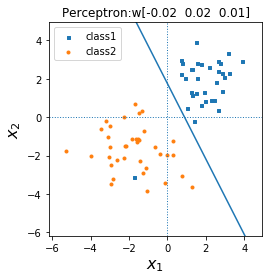

In [62]:
%run code/plot_xyw.py
plot_xyw(X_train, y_train, w.flatten(), X0=True)

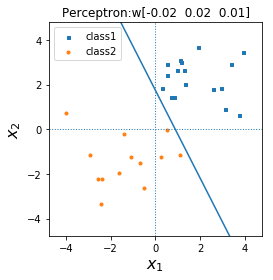

In [63]:
plot_xyw(X_test, y_test, w.flatten(), X0=True)